# Proyecto 1: Descargando datos de la web
Curso Ingeniería de Características


**Estephania Pivac Alcaraz**

---

Problema de interés:
Estudar la relación que existe entre la cantidad de accidentes de tránsito y la inversión a la conservación de carreteras.

## 1. Descargando los datos

Comenzamos cargando las bibliotecas necesarias.

In [1]:
import os  # Para manejo de archivos y directorios
import urllib.request # Una forma estandard de descargar datos
# import requests # Otra forma no de las librerías de uso comun

import datetime # Fecha de descarga
import pandas as pd # Solo para ver el archivo descargado
import zipfile # Descompresión de archivos
import numpy as np

Creamos los subdirectorios para guardar los datos de manera ordenada.

In [2]:
# pwd
print(os.getcwd())

#  Estos son los datos que vamos a descargar y donde vamos a guardarlos
accidentes_transito_2021_url = "https://www.inegi.org.mx/contenidos/programas/accidentes/datosabiertos/atus_anual_csv.zip"
accidentes_transito_2021_archivo = "accidentes_transito_2021.zip"

conservacion_carreteras_2019_url = "https://data.sct.gob.mx/datos/datos/abiertos/21101DGCCProgramaNacionalC.csv"
conservacion_carreteras_2019_archivo = "conservacion_carreteras_2019.csv"
subdir = "./data/" 

/content


Revisamos si ya existen los subdirectorios. Si no es así los creamos.

Enseguida, abrimos las url de los archivos, extraemos contenidos de los zip y los guardamos.

In [3]:
# Revisamos si el archivo existe. Si no existe, se procede a crearlo.
if not os.path.exists(accidentes_transito_2021_archivo):
  # Revisamos si el directorio existe. Si no es así procedemos a crearlo.
  if not os.path.exists(subdir):
    #Creamos el directorio 
    os.makedirs(subdir)
  # Abrimos la url y guardamos el objeto en mortalidad_2020_archivo
  urllib.request.urlretrieve(accidentes_transito_2021_url, subdir + accidentes_transito_2021_archivo)  
  # Extraemos el contenido del zip y lo guardamos.
  with zipfile.ZipFile(subdir + accidentes_transito_2021_archivo, "r") as zip_ref:
    zip_ref.extractall(subdir)

if not os.path.exists(conservacion_carreteras_2019_archivo):
    urllib.request.urlretrieve(conservacion_carreteras_2019_url, subdir + conservacion_carreteras_2019_archivo) 
    

Creamos un archivo tipo txt, con la información de las bases de datos y las fuentes de donde obtuvimos la información.

In [6]:
with open(subdir + "info.txt", 'w') as f:
  f.write("Archivos sobre accidentes de tránsito \n")
  info = """
  accidentes_transito_2021: Esta estadística mide la siniestralidad del 
  transporte a nivel nacional, y se genera a partir del acopio y procesamiento 
  de los datos alusivos a los accidentes ocurren en zonas no federales. Esta 
  información contribuyó a la planeación, organización del transporte y 
  la prevención de accidentes.
  Esta base de datos se obtuvo del sitio del INEGI:
  https://www.inegi.org.mx/programas/accidentes/#Datos_abiertos
  
  El objetivo principal de esta base de datos es producir información anual 
  sobre la siniestralidad del transporte terrestre a nivel nacional, entidad 
  federativa y municipio, mediante el acopio y procesamiento de datos alusivos 
  a los accidentes ocurridos en zonas no federales, contribuyendo con ello a 
  la planeación y organización del transporte.

  Se dispone de la estadística desde 1997 (la difusión se realiza siete meses 
  posteriores al término del año de referencia de la información).

  Cobertura temática
  Características de los accidentes de tránsito ocurridos en zonas no federales, 
  tales como:

      Hora de ocurrencia del accidente.
      Fecha de ocurrencia del accidente.
      Zona de ocurrencia del accidente.
      Clase de accidente.
      Tipo de accidente.
      Tipo de vehículo involucrado.
      Causa determinante o presunta del accidente.
      Superficie de rodamiento.
      Tipo de víctimas.
      Clase de víctima.
      Clasificador utilizado
      Estadísticas de transporte por carretera, del Instituto Interamericano de 
      Estadística.


  conservacion_carreteras_2019_archivo: Esta base de datos contiene información
  sobre el avance físico-financiero de obras públicas en tramos y puentes en 
  carreteras federales libres de peaje, del Programa Nacional de Conservación de 
  Carreteras. 

  Los datos se obtuvieron de datos abiertos del Gobierno de México de la 
  Secretaría de Comunicación y Transporte con fechas 15 de octubre de 2022, 
  estos datos se actualizan de manera irregular. La última actualización se 
  llevó a cabo en 2019-06-28. 

  Esta base de datos se obtuvo del sitio de Gobierno de México:
  https://datos.gob.mx/busca/dataset/infraestructura-carretera/resource/e75840ff-4b48-48b7-a302-7ce8546576a6

  """ 
  f.write(info + '\n')
  f.write("Descargado el " + datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S") + "\n")
  f.write("Desde: " + accidentes_transito_2021_url + "\n")
  f.write("Nombre: " + accidentes_transito_2021_archivo + "\n")
  f.write("Agregados conservación de carreteras 2019 desde: " + conservacion_carreteras_2019_url + "\n")
  f.write("Nombre: " + conservacion_carreteras_2019_archivo + "\n")

Se pretende realizar un estudio donde podamos ver cómo han evolucionado los accidentes viales, en qué estados de la República son más comunes. También resulta de interés saber cual es el efecto que ha tenido toda la inversión realizada en el programa de conservación de carreteras, y cómo ha contribuido a que Sonora cuente con carreteras más seguras.

## Accidentes de tránsito terrestre en zonas urbanas y suburbanas

Exploremos las primeras bases de datos.

In [7]:
df_accidentes_2021 = pd.read_csv(subdir + "conjunto_de_datos/atus_anual_2021.csv", index_col=False)
df_accidentes = df_accidentes_2021

# Creamos data frames de los accidentes de tránsito desde 2017
df_accidentes_2020 = pd.read_csv(subdir + "conjunto_de_datos/atus_anual_2020.csv", index_col=False)
df_accidentes_2019 = pd.read_csv(subdir + "conjunto_de_datos/atus_anual_2019.csv", index_col=False)
df_accidentes_2018 = pd.read_csv(subdir + "conjunto_de_datos/atus_anual_2018.csv", index_col=False)
df_accidentes_2017 = pd.read_csv(subdir + "conjunto_de_datos/atus_anual_2017.csv", index_col=False)

# Agregamos únicamente los datos del estado de Sonora
df_accidentes = df_accidentes.append(df_accidentes_2020)
df_accidentes = df_accidentes.append(df_accidentes_2019)
df_accidentes = df_accidentes.append(df_accidentes_2018)
df_accidentes = df_accidentes.append(df_accidentes_2017)

df_accidentes = df_accidentes.reset_index(drop = True)

In [8]:
df_accidentes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1802672 entries, 0 to 1802671
Data columns (total 45 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   COBERTURA     object
 1   ID_ENTIDAD    int64 
 2   ID_MUNICIPIO  int64 
 3   ANIO          int64 
 4   MES           int64 
 5   ID_HORA       int64 
 6   ID_MINUTO     int64 
 7   ID_DIA        int64 
 8   DIASEMANA     object
 9   URBANA        object
 10  SUBURBANA     object
 11  TIPACCID      object
 12  AUTOMOVIL     int64 
 13  CAMPASAJ      int64 
 14  MICROBUS      int64 
 15  PASCAMION     int64 
 16  OMNIBUS       int64 
 17  TRANVIA       int64 
 18  CAMIONETA     int64 
 19  CAMION        int64 
 20  TRACTOR       int64 
 21  FERROCARRI    int64 
 22  MOTOCICLET    int64 
 23  BICICLETA     int64 
 24  OTROVEHIC     int64 
 25  CAUSAACCI     object
 26  CAPAROD       object
 27  SEXO          object
 28  ALIENTO       object
 29  CINTURON      object
 30  ID_EDAD       int64 
 31  CONDMUERTO    int64 
 32

Como solo nos interesan los accidentes en carretera, nos quedaremos con los accidentes de tránsito en area "Suburbana"

In [9]:
df_accidentes['SUBURBANA'].value_counts()

Sin accidente en esta zona        1665900
Accidente en carretera estatal      91640
Accidente en camino rural           23934
Accidentes en otro camino           21198
Name: SUBURBANA, dtype: int64

In [10]:
df_accidentes['URBANA'].value_counts()

Accidente en intersección       1500391
Sin accidente en esta zona       201552
Accidente en no intersección     100729
Name: URBANA, dtype: int64

In [11]:
# Solo nos quedamos con los accidentes en área suburbana "Accidente en camino estatal"
df_accidentes = df_accidentes[df_accidentes['SUBURBANA'] == 'Accidente en carretera estatal']
df_accidentes.pop('URBANA')
df_accidentes.pop('SUBURBANA')
df_accidentes

,COBERTURA,ID_ENTIDAD,ID_MUNICIPIO,ANIO,MES,ID_HORA,ID_MINUTO,ID_DIA,DIASEMANA,TIPACCID,...,PEATMUERTO,PEATHERIDO,CICLMUERTO,CICLHERIDO,OTROMUERTO,OTROHERIDO,NEMUERTO,NEHERIDO,CLASACC,ESTATUS
33,Municipal,1,1,2021,1,20,45,3,Domingo,Salida del camino,...,0,0,0,0,0,0,0,0,Sólo daños,Cifras Definitivas
47,Municipal,1,1,2021,1,20,1,4,lunes,Salida del camino,...,0,0,0,0,0,0,0,0,No fatal,Cifras Definitivas
153,Municipal,1,1,2021,1,12,2,17,Domingo,Colisión con vehículo automotor,...,0,0,0,0,0,0,0,0,Sólo daños,Cifras Definitivas
209,Municipal,1,1,2021,1,20,0,24,Domingo,Colisión con vehículo automotor,...,0,0,0,0,0,0,0,0,Sólo daños,Cifras Definitivas
220,Municipal,1,1,2021,1,3,0,26,Martes,Salida del camino,...,0,0,0,0,0,0,0,0,Sólo daños,Cifras Definitivas
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1802595,Municipal,32,48,2017,12,14,45,4,Lunes,Salida del camino,...,0,0,0,0,0,0,0,0,Fatal,Cifras Revisadas
1802601,Municipal,32,51,2017,12,2,50,24,Domingo,Volcadura,...,0,0,0,0,0,0,0,0,Fatal,Cifras Revisadas
1802602,Municipal,32,51,2017,12,15,45,26,Martes,Volcadura,...,0,0,0,0,0,0,0,0,Fatal,Cifras Revisadas
1802603,Municipal,32,51,2017,12,21,44,25,Lunes,Colisión con vehículo automotor,...,0,0,0,0,0,0,0,0,No fatal,Cifras Revisadas


In [12]:
drop_col = ['CONDMUERTO', 'CONDHERIDO', 'PASAMUERTO', 'PASAHERIDO', 'PEATMUERTO', 'PEATHERIDO', 'CICLMUERTO', 'CICLHERIDO', 'OTROMUERTO', 'OTROHERIDO', 'NEMUERTO', 'NEHERIDO', 'COBERTURA', 'ESTATUS']
for x in drop_col:
  df_accidentes.pop(x)
df_accidentes

,ID_ENTIDAD,ID_MUNICIPIO,ANIO,MES,ID_HORA,ID_MINUTO,ID_DIA,DIASEMANA,TIPACCID,AUTOMOVIL,...,MOTOCICLET,BICICLETA,OTROVEHIC,CAUSAACCI,CAPAROD,SEXO,ALIENTO,CINTURON,ID_EDAD,CLASACC
33,1,1,2021,1,20,45,3,Domingo,Salida del camino,1,...,0,0,0,Conductor,Pavimentada,Hombre,Se ignora,Se ignora,30,Sólo daños
47,1,1,2021,1,20,1,4,lunes,Salida del camino,1,...,0,0,0,Conductor,Pavimentada,Mujer,Se ignora,Se ignora,17,No fatal
153,1,1,2021,1,12,2,17,Domingo,Colisión con vehículo automotor,2,...,0,0,0,Conductor,Pavimentada,Hombre,Se ignora,Se ignora,54,Sólo daños
209,1,1,2021,1,20,0,24,Domingo,Colisión con vehículo automotor,2,...,0,0,0,Conductor,Pavimentada,Mujer,Sí,Se ignora,30,Sólo daños
220,1,1,2021,1,3,0,26,Martes,Salida del camino,1,...,0,0,0,Conductor,Pavimentada,Se fugó,Se ignora,Se ignora,0,Sólo daños
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1802595,32,48,2017,12,14,45,4,Lunes,Salida del camino,1,...,0,0,0,Conductor,Pavimentada,Se fugó,Se ignora,Se ignora,0,Fatal
1802601,32,51,2017,12,2,50,24,Domingo,Volcadura,0,...,0,0,0,Conductor,Pavimentada,Hombre,Sí,Se ignora,46,Fatal
1802602,32,51,2017,12,15,45,26,Martes,Volcadura,0,...,0,0,0,Conductor,Pavimentada,Se fugó,Se ignora,Se ignora,0,Fatal
1802603,32,51,2017,12,21,44,25,Lunes,Colisión con vehículo automotor,0,...,0,0,0,Conductor,Pavimentada,Se fugó,Se ignora,Se ignora,0,No fatal


### 1. Variables cualitativas


Para facilitar nuestro análisis y la agregación de algunas columnas recodificaremos las variables cualitativas a variables dummy.

Exploremos un poco lo que sucede con las variables cualitativas de nuestro data frame.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


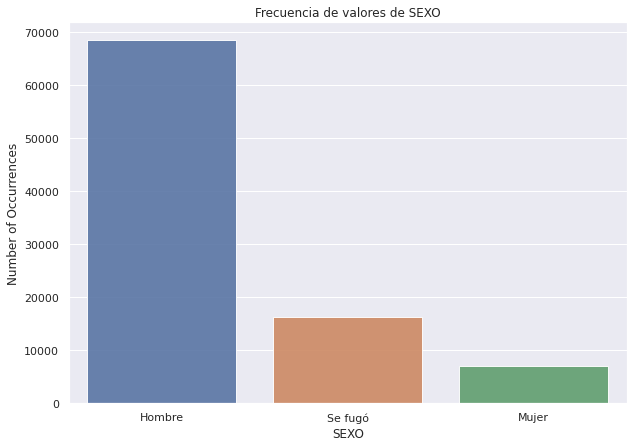

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

sexo_count = df_accidentes['SEXO'].value_counts()

plt.figure(figsize=(10, 7))
sns.set(style="darkgrid")
sns.barplot(sexo_count.index, sexo_count.values, alpha=0.9)

plt.title('Frecuencia de valores de SEXO')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('SEXO', fontsize=12)
plt.show()

In [14]:
df_accidentes['SEXO'].value_counts()

Hombre     68406
Se fugó    16236
Mujer       6998
Name: SEXO, dtype: int64

In [15]:
df_accidentes['TIPACCID'].value_counts()

Colisión con vehículo automotor          35128
Salida del camino                        16549
Volcadura                                13434
Colisión con objeto fijo                 10191
Colisión con motocicleta                  9071
Colisión con animal                       2043
Colisión con peatón (atropellamiento)     1864
Otro                                      1474
Colisión con ciclista                      787
Caída de pasajero                          615
Incendio                                   311
Colisión con ferrocarril                   173
Name: TIPACCID, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


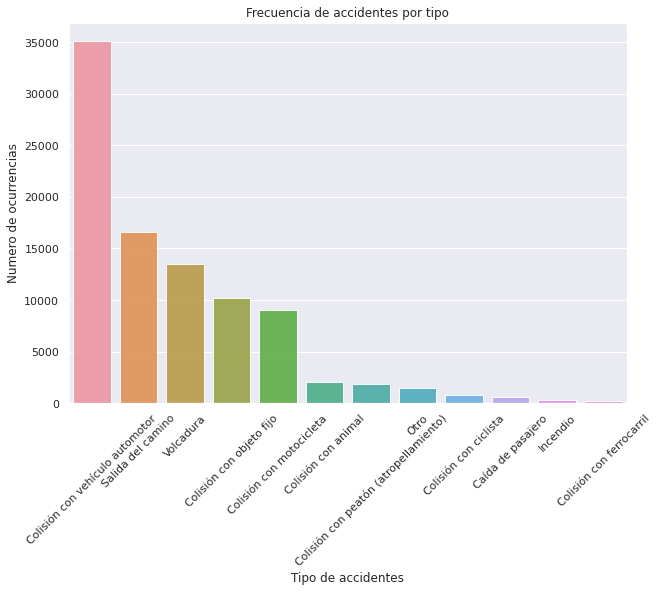

In [16]:
tipo_acc_count = df_accidentes['TIPACCID'].value_counts()

plt.figure(figsize=(10, 7))
sns.set(style="darkgrid")
sns.barplot(tipo_acc_count.index, tipo_acc_count.values, alpha=0.9)

plt.title('Frecuencia de accidentes por tipo')
plt.ylabel('Numero de ocurrencias', fontsize=12)
plt.xlabel('Tipo de accidentes', fontsize=12)
plt.xticks(rotation=45)
plt.show()

Utilizaremos onehot encoding.

In [17]:
df_accidentes_onehot = df_accidentes.copy()

variables_cualitativas = ['DIASEMANA', 'TIPACCID', 'CAUSAACCI', 'CAPAROD', 'SEXO', 'ALIENTO', 'CINTURON', 'CLASACC', 'ID_MUNICIPIO']

for x in variables_cualitativas:
  df_accidentes_onehot = pd.get_dummies(
      df_accidentes_onehot, 
      columns = [x], 
      prefix = [x],
      dtype=int
  )

df_accidentes_onehot

,ID_ENTIDAD,ANIO,MES,ID_HORA,ID_MINUTO,ID_DIA,AUTOMOVIL,CAMPASAJ,MICROBUS,PASCAMION,...,ID_MUNICIPIO_551,ID_MUNICIPIO_553,ID_MUNICIPIO_555,ID_MUNICIPIO_557,ID_MUNICIPIO_558,ID_MUNICIPIO_559,ID_MUNICIPIO_560,ID_MUNICIPIO_565,ID_MUNICIPIO_568,ID_MUNICIPIO_570
33,1,2021,1,20,45,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
47,1,2021,1,20,1,4,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
153,1,2021,1,12,2,17,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
209,1,2021,1,20,0,24,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
220,1,2021,1,3,0,26,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1802595,32,2017,12,14,45,4,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1802601,32,2017,12,2,50,24,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1802602,32,2017,12,15,45,26,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1802603,32,2017,12,21,44,25,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 2. Fechas

Convertimos fechas a formato adecuado.

In [18]:
# df_date = {
#     'YEAR' : df_accidentes.ANIO,
#     'MONTH' : df_accidentes.MES,
#     'DAY': df_accidentes.ID_DIA
# }
# df_accidentes['Date'] = pd.to_datetime(df_date, format='%m/%d/%Y', errors='coerce')
# df_accidentes.info()

Debido a que la base de datos que utilizaremos para relacionar la conservación de carreteras no tiene columna de tipo fecha, asociaremos los valores por estado. Por esta razón no utilizaremos esta columna de fecha. Sin embargo, podemos tratar al mes como un tipo de dato ordinal. 

También crearemos una columna por año, separaremos esta variable en varias categorías.

In [19]:
df_accidentes_onehot = pd.get_dummies(
    df_accidentes_onehot, 
    columns = ['MES'], 
    prefix = ['MES'],
    dtype=int
)

df_accidentes_onehot = pd.get_dummies(
    df_accidentes_onehot, 
    columns = ['ANIO'], 
    prefix = ['ANIO'],
    dtype=int
)

df_accidentes_onehot

,ID_ENTIDAD,ID_HORA,ID_MINUTO,ID_DIA,AUTOMOVIL,CAMPASAJ,MICROBUS,PASCAMION,OMNIBUS,TRANVIA,...,MES_8,MES_9,MES_10,MES_11,MES_12,ANIO_2017,ANIO_2018,ANIO_2019,ANIO_2020,ANIO_2021
33,1,20,45,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
47,1,20,1,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
153,1,12,2,17,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
209,1,20,0,24,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
220,1,3,0,26,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1802595,32,14,45,4,1,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
1802601,32,2,50,24,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
1802602,32,15,45,26,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
1802603,32,21,44,25,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0


Nos desharemos de las columnas de fecha: ID_HORA, ID_MINUTO, ID_DIA

In [20]:
drop_col = ['ID_HORA', 'ID_MINUTO', 'ID_DIA']
for x in drop_col:
  df_accidentes_onehot.pop(x)
df_accidentes_onehot

,ID_ENTIDAD,AUTOMOVIL,CAMPASAJ,MICROBUS,PASCAMION,OMNIBUS,TRANVIA,CAMIONETA,CAMION,TRACTOR,...,MES_8,MES_9,MES_10,MES_11,MES_12,ANIO_2017,ANIO_2018,ANIO_2019,ANIO_2020,ANIO_2021
33,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
47,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
153,1,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
209,1,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
220,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1802595,32,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
1802601,32,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,1,0,0,0,0
1802602,32,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,0
1802603,32,0,0,0,0,0,0,2,0,0,...,0,0,0,0,1,1,0,0,0,0


In [21]:
df_accidentes_onehot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91640 entries, 33 to 1802605
Columns: 372 entries, ID_ENTIDAD to ANIO_2021
dtypes: int64(372)
memory usage: 260.8 MB


### 3. Variables cuantitativas

La base de datos solo posee una característica de tipo cuantitativo: 'ID_EDAD'. Como estamos interesados en los accidentes totales por estado, esta variable la convertiremos a ordinal.
Categorización de la edad:

In [22]:
import math
valores = [-math.inf ,1 ,10, 20, 30, 40, 50, 60, 70, 80, 99, math.inf]

categorias = ['Se_fugó', '1-10', '10-20', '20-30', '30-40','40-50','50-60','60-70', '70-80','80-99', 'Se_ignora']

df_accidentes_onehot['EDAD'] = pd.cut(x = df_accidentes_onehot['ID_EDAD'], bins = valores, labels = categorias)
df_accidentes_onehot

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  


,ID_ENTIDAD,AUTOMOVIL,CAMPASAJ,MICROBUS,PASCAMION,OMNIBUS,TRANVIA,CAMIONETA,CAMION,TRACTOR,...,MES_9,MES_10,MES_11,MES_12,ANIO_2017,ANIO_2018,ANIO_2019,ANIO_2020,ANIO_2021,EDAD
33,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,20-30
47,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,10-20
153,1,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,50-60
209,1,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,20-30
220,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,Se_fugó
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1802595,32,1,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,Se_fugó
1802601,32,0,0,0,0,0,0,1,0,0,...,0,0,0,1,1,0,0,0,0,40-50
1802602,32,0,0,0,0,0,0,0,1,0,...,0,0,0,1,1,0,0,0,0,Se_fugó
1802603,32,0,0,0,0,0,0,2,0,0,...,0,0,0,1,1,0,0,0,0,Se_fugó


In [23]:
# Utilizamos one hot para separar en columnas las diferentes categorías de edades que obtuvimos

df_accidentes_onehot = pd.get_dummies(
    df_accidentes_onehot, 
    columns = ['EDAD'], 
    prefix = ['EDAD'],
    dtype=int
)

Aplicaremos OneHot Encoding a la variable Edad para obtener variables dummy para cada categoría, y borramos la columna "ID_EDAD".

In [24]:
df_accidentes_onehot.pop('ID_EDAD')

33         30
47         17
153        54
209        30
220         0
           ..
1802595     0
1802601    46
1802602     0
1802603     0
1802605    24
Name: ID_EDAD, Length: 91640, dtype: int64

In [25]:
df_accidentes_onehot['EDAD_Se_ignora'].value_counts()
# Como no hay instancias de las cuales se ignore la edad, quitaremos esta columna del data frame.
df_accidentes_onehot.pop('EDAD_Se_ignora')

33         0
47         0
153        0
209        0
220        0
          ..
1802595    0
1802601    0
1802602    0
1802603    0
1802605    0
Name: EDAD_Se_ignora, Length: 91640, dtype: int64

### 4. Transformación para adecuar este data frame y agregar el siguiente

Sumaremos renglones para obtener la cantidad de accidente de acuerdo a cada categoría por estado.

In [26]:
# Obtenemos los nombres de las columnas de nuestro data frame
nombres_columnas = list(df_accidentes_onehot.columns.values)

# Creamos un nuevo data frame con las mismas columnas
df_tidy_accidentes = pd.DataFrame(columns = nombres_columnas) 

# Sumamos el total de accidentes por estado
for i in range(1, 33):
  df = pd.DataFrame(df_accidentes_onehot[df_accidentes_onehot['ID_ENTIDAD'] == i].iloc[:, 1:].sum(axis=0, numeric_only=True))
  df = df.transpose()
  df['ID_ENTIDAD'] = i
  df_tidy_accidentes = df_tidy_accidentes.append(df)

# Reinicamos los índices
df_tidy_accidentes = df_tidy_accidentes.reset_index(drop = True)

# Obtenemos nuestro data frame
df_tidy_accidentes

,ID_ENTIDAD,AUTOMOVIL,CAMPASAJ,MICROBUS,PASCAMION,OMNIBUS,TRANVIA,CAMIONETA,CAMION,TRACTOR,...,EDAD_Se_fugó,EDAD_1-10,EDAD_10-20,EDAD_20-30,EDAD_30-40,EDAD_40-50,EDAD_50-60,EDAD_60-70,EDAD_70-80,EDAD_80-99
0,1,1299,165,2,25,8,0,178,78,49,...,182,0,148,366,267,161,108,51,18,53
1,2,531,138,2,5,7,0,99,21,36,...,91,0,37,119,107,78,50,16,5,26
2,3,137,10,0,1,0,0,18,10,5,...,14,0,7,29,23,12,11,5,3,7
3,4,459,36,0,6,1,0,188,38,19,...,191,0,17,136,143,97,40,6,2,24
4,5,427,142,0,16,1,0,122,21,20,...,65,0,41,137,116,89,61,19,11,24
5,6,2118,110,1,41,4,0,397,228,71,...,110,0,146,514,415,412,166,98,29,178
6,7,2514,171,24,33,28,0,536,222,110,...,786,0,24,157,219,116,52,29,4,1242
7,8,4700,884,5,40,7,0,334,268,260,...,515,0,450,1196,879,652,365,178,86,313
8,9,11,0,0,0,0,0,0,0,0,...,4,0,2,0,1,0,0,0,0,0
9,10,962,614,2,32,3,0,200,114,79,...,114,0,126,370,299,198,150,53,26,98


In [27]:
df_tidy_accidentes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Columns: 381 entries, ID_ENTIDAD to EDAD_80-99
dtypes: object(381)
memory usage: 95.4+ KB


## Conservación de carreteras 2019

Obtendremos la información de interés en data frame y lo uniremos con el df tidy.

In [28]:
# Creamos el data frame de conservación de carreteras
conservacion_carreteras_2019 = pd.read_csv(subdir + "conservacion_carreteras_2019.csv", index_col=False, encoding='latin-1')

conservacion_carreteras_2019.reset_index(drop = True)

,Unnamed: 0,ENTIDAD,PROGRAMA,SUBPROGRAMA,NOMBRE DE LA OBRA,UBICACIÓN Km INI,UBICACIÓN Km FIN,META,UNIDAD,ASIGNACIÓN,...,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,TIPO DE,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27
0,UR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,SAOP,Municipio,ESP,ESP,TT,RED,TPDA,COMPROMETIDO,LIQUIDADO,TOTAL
1,211,CENTRALIZADO,Estudios y/o Proyectos,Estudios y/o Proyectos,Estudios y/o Proyectos,NaN,NaN,EYPC,NaN,1.358579e+08,...,NaN,NaN,NaN,NaN,EYP,NaN,NaN,"20,799,376.62","108,636,956.79","129,436,333.41"
2,211,CENTRALIZADO,Programa Asociación Público Privada de Conserv...,Programa Asociación Público Privada de Conserv...,(APP Coatzacoalcos - Villahermosa),NaN,NaN,APPC,NaN,1.091483e+08,...,NaN,NaN,NaN,NaN,APP,NaN,NaN,0,"109,148,272.00","109,148,272.00"
3,211,CENTRALIZADO,Programa Asociación Público Privada de Conserv...,Programa Asociación Público Privada de Conserv...,(APP Querétaro - San Lu¡s Potos¡),NaN,NaN,APPC,NaN,4.997081e+07,...,NaN,NaN,NaN,NaN,APP,NaN,NaN,0,"49,970,811.76","49,970,811.76"
4,211,CENTRALIZADO,Programa Asociación Público Privada de Conserv...,Programa Asociación Público Privada de Conserv...,(APP Texcoco- Zacatepec),NaN,NaN,APPC,NaN,8.514464e+07,...,NaN,NaN,NaN,NaN,APP,NaN,NaN,0,"85,144,638.22","85,144,638.22"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1855,652,ZACATECAS,Conservación Rutinaria,Conservación Rutinaria de Puentes,Conservación Rutinaria de Puentes (contrato no...,NaN,NaN,161,pza.,6.094561e+06,...,652CB00282,NaN,NaN,NaN,CRP,NaN,NaN,0,"6,094,560.87","6,094,560.87"
1856,652,ZACATECAS,Conservación Rutinaria,Conservación Rutinaria de Puentes,Conservación Rutinaria de Puentes (contrato no...,NaN,NaN,147,pza.,5.716601e+06,...,652CB00283,NaN,NaN,NaN,CRP,NaN,NaN,0,"5,716,600.86","5,716,600.86"
1857,652,ZACATECAS,Otros Subprogramas,Estudios y/o Proyectos,Estudios y/o Proyectos,NaN,NaN,SM,NaN,6.250000e+06,...,NaN,NaN,NaN,NaN,EYP,NaN,NaN,0,"1,633,732.27","1,633,732.27"
1858,652,ZACATECAS,Otros Subprogramas,Seguimiento,Seguimiento y Control del Programa de Obras (c...,NaN,NaN,SM,NaN,2.625802e+06,...,NaN,NaN,NaN,NaN,IYS,NaN,NaN,0,"2,625,802.00","2,625,802.00"


### 1. Elementos del dataframe

Vemos que algunas columnas no tienen nombre. El nombre se encuentra en el primer renglón de nuestro dataframe. Por lo que cambiaremos los nombres "unnamed: n" por los nombres que deberían tener y eliminaremos el primer renlgón.

In [29]:
conservacion_carreteras_2019.info()

# Cambiamos el nombre de la primera columna
conservacion_carreteras_2019.rename({'Unnamed: 0' : 'UR'}, axis=1, inplace=True)
# Creamos una lista con los nombres que utilizaremos para las columnas 13-28
nombres_columnas_conservacion = ['NUM', 'CLA', 'CONTRATO', 'RFC', 'EMPRESA', 'SAOP', 'MUNICIPIO', 'ESP', 'ESP', 'TT', 'TIPO_DE_RED', 'TPDA', 'COMPROMETIDO', 'LIQUIDADO', 'TOTAL']
# Cambiamos los nombres de las columnas 13-28
for i in range(13, 28):
  name1 = nombres_columnas_conservacion[i-13]
  x = 'Unnamed: ' + str(i)
  conservacion_carreteras_2019.rename({x : name1}, axis=1, inplace=True)

# Eliminamos el primer renglón
conservacion_carreteras_2019 = conservacion_carreteras_2019.iloc[1:, :]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1860 entries, 0 to 1859
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            1860 non-null   object 
 1   ENTIDAD               1859 non-null   object 
 2   PROGRAMA              1859 non-null   object 
 3   SUBPROGRAMA           1859 non-null   object 
 4   NOMBRE DE LA OBRA     1859 non-null   object 
 5   UBICACIÓN Km INI      797 non-null    object 
 6   UBICACIÓN Km FIN      619 non-null    object 
 7   META                  1859 non-null   object 
 8   UNIDAD                1379 non-null   object 
 9   ASIGNACIÓN            1859 non-null   float64
 10  AVANCE FISICO UNIDAD  1378 non-null   object 
 11  AVANCE FISICO %       1378 non-null   object 
 12  AVANCE                1860 non-null   object 
 13  Unnamed: 13           1860 non-null   object 
 14  Unnamed: 14           1798 non-null   object 
 15  Unnamed: 15          

Notemos que la columna Entidad toma como valores los nombres de los estados, sin embargo, en el dataframe de accidentes el estado estaba identificado por el ID_ESTADO, por lo que agregaremos una nueva columna con el ID_ESTADO correspondiente.

Para realizar esto utilizaromos los valores de los catálogos de datos.


In [30]:
# Creamos el data frame de conservación de carreteras
id_entidad = pd.read_csv(subdir + "catalogos/" + 'tc_entidad.csv', index_col=False, encoding='latin-1')

id_entidad.reset_index(drop = True)
id_entidad['NOM_ENTIDAD'] = id_entidad['NOM_ENTIDAD'].str.upper()
id_entidad

,ï»¿ID_ENTIDAD,NOM_ENTIDAD
0,1,AGUASCALIENTES
1,2,BAJA CALIFORNIA
2,3,BAJA CALIFORNIA SUR
3,4,CAMPECHE
4,5,COAHUILA DE ZARAGOZA
5,6,COLIMA
6,7,CHIAPAS
7,8,CHIHUAHUA
8,9,CIUDAD DE MÃ©XICO
9,10,DURANGO


In [31]:
conservacion_carreteras_2019['ENTIDAD'].value_counts()

TAMAULIPAS             101
VERACRUZ                99
JALISCO                 93
SINALOA                 93
MICHOACAN               92
CHIAPAS                 90
DURANGO                 86
OAXACA                  76
SONORA                  69
CHIHUAHUA               69
GUERRERO                65
SAN LUIS POTOSI         62
MEXICO                  61
NUEVO LEON              59
BAJA CALIFORNIA SUR     58
BAJA CALIFORNIA         54
TABASCO                 52
ZACATECAS               51
NAYARIT                 50
PUEBLA                  49
QUERETARO               49
TLAXCALA                48
COAHUILA                41
YUCATAN                 40
HIDALGO                 39
MORELOS                 37
CAMPECHE                37
QUINTANA ROO            35
GUANAJUATO              35
AGUASCALIENTES          32
COLIMA                  26
CENTRALIZADO            11
Name: ENTIDAD, dtype: int64

In [32]:
id_entidad['NOM_ENTIDAD'].value_counts()

AGUASCALIENTES                     1
BAJA CALIFORNIA                    1
YUCATAN                            1
VERACRUZ DE IGNACIO DE LA LLAVE    1
TLAXCALA                           1
TAMAULIPAS                         1
TABASCO                            1
SONORA                             1
SINALOA                            1
SAN LUIS POTOSI                    1
QUINTANA ROO                       1
QUERETARO                          1
PUEBLA                             1
OAXACA                             1
NUEVO LEON                         1
NAYARIT                            1
MORELOS                            1
MICHOACAN DE OCAMPO                1
MEXICO                             1
JALISCO                            1
HIDALGO                            1
GUERRERO                           1
GUANAJUATO                         1
DURANGO                            1
CIUDAD DE MÃ©XICO                  1
CHIHUAHUA                          1
CHIAPAS                            1
C

Notemos que en el df sobre conservación de carreteras, en la columna Entidad aparecen los nombres de los estados, pero en lugar de tener "CIUDAD DE MEXICO" escribieron 'CENTRALIZADO'.

En el caso del id_entidad, tenemos la misma situación, donde en lugar de tener "CIUDAD DE MEXICO" escribieron 'CIUDAD DE MÃ©XICO'.
Además hay algunas diferencias en valores de acuerdo al nombre asignado al estado por lo que realizaremos las siguientes conversiones:
'VERACRUZ DE IGNACIO DE LA LLAVE' -> 'VERACRUZ'
'MICHOACAN DE OCAMPO' -> 'MICHOACAN'
'COAHUILA DE ZARAGOZA' -> 'COAHUILA'

In [33]:
conservacion_carreteras_2019.replace('CENTRALIZADO', "CIUDAD DE MEXICO", True)
# Cambiamos los nombres de la columas PROGRAMA y SUBPROGRAMA por los mismos nombres pero sin incluir ningún caracter de espacio
conservacion_carreteras_2019.rename({'PROGRAMA ' : 'PROGRAMA'}, axis=1, inplace=True)
conservacion_carreteras_2019.rename({'SUBPROGRAMA ' : 'SUBPROGRAMA'}, axis=1, inplace=True)
conservacion_carreteras_2019

,UR,ENTIDAD,PROGRAMA,SUBPROGRAMA,NOMBRE DE LA OBRA,UBICACIÓN Km INI,UBICACIÓN Km FIN,META,UNIDAD,ASIGNACIÓN,...,SAOP,MUNICIPIO,ESP,ESP,TT,TIPO DE,TPDA,COMPROMETIDO,LIQUIDADO,TOTAL
1,211,CIUDAD DE MEXICO,Estudios y/o Proyectos,Estudios y/o Proyectos,Estudios y/o Proyectos,NaN,NaN,EYPC,NaN,1.358579e+08,...,NaN,NaN,NaN,NaN,EYP,NaN,NaN,"20,799,376.62","108,636,956.79","129,436,333.41"
2,211,CIUDAD DE MEXICO,Programa Asociación Público Privada de Conserv...,Programa Asociación Público Privada de Conserv...,(APP Coatzacoalcos - Villahermosa),NaN,NaN,APPC,NaN,1.091483e+08,...,NaN,NaN,NaN,NaN,APP,NaN,NaN,0,"109,148,272.00","109,148,272.00"
3,211,CIUDAD DE MEXICO,Programa Asociación Público Privada de Conserv...,Programa Asociación Público Privada de Conserv...,(APP Querétaro - San Lu¡s Potos¡),NaN,NaN,APPC,NaN,4.997081e+07,...,NaN,NaN,NaN,NaN,APP,NaN,NaN,0,"49,970,811.76","49,970,811.76"
4,211,CIUDAD DE MEXICO,Programa Asociación Público Privada de Conserv...,Programa Asociación Público Privada de Conserv...,(APP Texcoco- Zacatepec),NaN,NaN,APPC,NaN,8.514464e+07,...,NaN,NaN,NaN,NaN,APP,NaN,NaN,0,"85,144,638.22","85,144,638.22"
5,211,CIUDAD DE MEXICO,Programa Asociación Público Privada de Conserv...,Programa Asociación Público Privada de Conserv...,(APP Saltillo - Monterrey-La Gloria),NaN,NaN,APPC,NaN,4.200000e+07,...,NaN,NaN,NaN,NaN,APP,NaN,NaN,0,"24,157,274.76","24,157,274.76"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1855,652,ZACATECAS,Conservación Rutinaria,Conservación Rutinaria de Puentes,Conservación Rutinaria de Puentes (contrato no...,NaN,NaN,161,pza.,6.094561e+06,...,652CB00282,NaN,NaN,NaN,CRP,NaN,NaN,0,"6,094,560.87","6,094,560.87"
1856,652,ZACATECAS,Conservación Rutinaria,Conservación Rutinaria de Puentes,Conservación Rutinaria de Puentes (contrato no...,NaN,NaN,147,pza.,5.716601e+06,...,652CB00283,NaN,NaN,NaN,CRP,NaN,NaN,0,"5,716,600.86","5,716,600.86"
1857,652,ZACATECAS,Otros Subprogramas,Estudios y/o Proyectos,Estudios y/o Proyectos,NaN,NaN,SM,NaN,6.250000e+06,...,NaN,NaN,NaN,NaN,EYP,NaN,NaN,0,"1,633,732.27","1,633,732.27"
1858,652,ZACATECAS,Otros Subprogramas,Seguimiento,Seguimiento y Control del Programa de Obras (c...,NaN,NaN,SM,NaN,2.625802e+06,...,NaN,NaN,NaN,NaN,IYS,NaN,NaN,0,"2,625,802.00","2,625,802.00"


In [34]:
# Cambiamos los valores "CIUDAD DE MÃ©XICO" por "CIUDAD DE MEXICO"
id_entidad.replace('CIUDAD DE MÃ©XICO', "CIUDAD DE MEXICO", True)
# Cambiamos los nombres de la columas por 'ID_ENTIDAD' y por 'ENTIDAD'
id_entidad.rename({'NOM_ENTIDAD' : 'ENTIDAD'}, axis=1, inplace=True)
id_entidad.rename({'ï»¿ID_ENTIDAD' : 'ID_ENTIDAD'}, axis=1, inplace=True)

# Cambiamos los valores de nombres de entidad por los mencionados
id_entidad.replace('VERACRUZ DE IGNACIO DE LA LLAVE', 'VERACRUZ', True)
id_entidad.replace('MICHOACAN DE OCAMPO', 'MICHOACAN', True)
id_entidad.replace('COAHUILA DE ZARAGOZA', 'COAHUILA', True)

id_entidad

,ID_ENTIDAD,ENTIDAD
0,1,AGUASCALIENTES
1,2,BAJA CALIFORNIA
2,3,BAJA CALIFORNIA SUR
3,4,CAMPECHE
4,5,COAHUILA
5,6,COLIMA
6,7,CHIAPAS
7,8,CHIHUAHUA
8,9,CIUDAD DE MEXICO
9,10,DURANGO


Agregaremos una columna al DF conservacion_carreteras_2019 con los ID de entidad. Esto con la finalidad de conectar el dataframe de accidentes con la información de la inversión en conservación de carreteras por estado.

In [35]:
conservacion_carreteras_2019 = conservacion_carreteras_2019.join(id_entidad.set_index('ENTIDAD'), on='ENTIDAD')


### 2. Variables cuantitativas

Convertimos la columna 'TOTAL' a valores numéricos float.

In [36]:
conservacion_carreteras_2019['TOTAL'] = conservacion_carreteras_2019['TOTAL'].str.replace(',', '').astype(float)
conservacion_carreteras_2019

,UR,ENTIDAD,PROGRAMA,SUBPROGRAMA,NOMBRE DE LA OBRA,UBICACIÓN Km INI,UBICACIÓN Km FIN,META,UNIDAD,ASIGNACIÓN,...,MUNICIPIO,ESP,ESP,TT,TIPO DE,TPDA,COMPROMETIDO,LIQUIDADO,TOTAL,ID_ENTIDAD
1,211,CIUDAD DE MEXICO,Estudios y/o Proyectos,Estudios y/o Proyectos,Estudios y/o Proyectos,NaN,NaN,EYPC,NaN,1.358579e+08,...,NaN,NaN,NaN,EYP,NaN,NaN,"20,799,376.62","108,636,956.79",1.294363e+08,9
2,211,CIUDAD DE MEXICO,Programa Asociación Público Privada de Conserv...,Programa Asociación Público Privada de Conserv...,(APP Coatzacoalcos - Villahermosa),NaN,NaN,APPC,NaN,1.091483e+08,...,NaN,NaN,NaN,APP,NaN,NaN,0,"109,148,272.00",1.091483e+08,9
3,211,CIUDAD DE MEXICO,Programa Asociación Público Privada de Conserv...,Programa Asociación Público Privada de Conserv...,(APP Querétaro - San Lu¡s Potos¡),NaN,NaN,APPC,NaN,4.997081e+07,...,NaN,NaN,NaN,APP,NaN,NaN,0,"49,970,811.76",4.997081e+07,9
4,211,CIUDAD DE MEXICO,Programa Asociación Público Privada de Conserv...,Programa Asociación Público Privada de Conserv...,(APP Texcoco- Zacatepec),NaN,NaN,APPC,NaN,8.514464e+07,...,NaN,NaN,NaN,APP,NaN,NaN,0,"85,144,638.22",8.514464e+07,9
5,211,CIUDAD DE MEXICO,Programa Asociación Público Privada de Conserv...,Programa Asociación Público Privada de Conserv...,(APP Saltillo - Monterrey-La Gloria),NaN,NaN,APPC,NaN,4.200000e+07,...,NaN,NaN,NaN,APP,NaN,NaN,0,"24,157,274.76",2.415727e+07,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1855,652,ZACATECAS,Conservación Rutinaria,Conservación Rutinaria de Puentes,Conservación Rutinaria de Puentes (contrato no...,NaN,NaN,161,pza.,6.094561e+06,...,NaN,NaN,NaN,CRP,NaN,NaN,0,"6,094,560.87",6.094561e+06,32
1856,652,ZACATECAS,Conservación Rutinaria,Conservación Rutinaria de Puentes,Conservación Rutinaria de Puentes (contrato no...,NaN,NaN,147,pza.,5.716601e+06,...,NaN,NaN,NaN,CRP,NaN,NaN,0,"5,716,600.86",5.716601e+06,32
1857,652,ZACATECAS,Otros Subprogramas,Estudios y/o Proyectos,Estudios y/o Proyectos,NaN,NaN,SM,NaN,6.250000e+06,...,NaN,NaN,NaN,EYP,NaN,NaN,0,"1,633,732.27",1.633732e+06,32
1858,652,ZACATECAS,Otros Subprogramas,Seguimiento,Seguimiento y Control del Programa de Obras (c...,NaN,NaN,SM,NaN,2.625802e+06,...,NaN,NaN,NaN,IYS,NaN,NaN,0,"2,625,802.00",2.625802e+06,32


Crearemos un data frame que se llame "df_conservacion" que contenga únicamente las columnas de interés:


*   ID_ENTIDAD
*   ENTIDAD
*   PROGRAMA
*   TOTAL

TOTAL: Representa la cantidad total inverdida.





In [37]:
df_conservacion = pd.DataFrame(columns=['ID_ENTIDAD', 'ENTIDAD', 'TOTAL_CONSERVACION', 'PROGRAMA_CONSERVACION'])
df_conservacion[['ID_ENTIDAD', 'ENTIDAD', 'TOTAL_CONSERVACION','PROGRAMA_CONSERVACION']] = conservacion_carreteras_2019[['ID_ENTIDAD', 'ENTIDAD', 'TOTAL','PROGRAMA']]
df_conservacion['PROGRAMA_CONSERVACION'].value_counts()

Conservación Periódica                                  721
Conservación Rutinaria                                  632
Señalamiento                                            234
Reconstrucción                                          125
Otros Subprogramas                                       80
Coparticipación FONDEN                                   26
Conservación Rutinaria                                   14
Programa Asociación Público Privada de Conservación      11
Programa Asociación Público Privada de Conservación       7
Señalamiento                                              4
Reconstrucción                                            2
Contratos Plurianuales de Conservación de Carreteras      2
Estudios y/o Proyectos                                    1
Name: PROGRAMA_CONSERVACION, dtype: int64

### 3. Variables cualitativas

Convertiremos la variable de programas de conservación a diferentes variables dummy, utilizando el método onehot encoding.

In [38]:
df_conservacion = pd.get_dummies(
    df_conservacion, 
    columns = ['PROGRAMA_CONSERVACION'], 
    prefix = ['PROGRAMA'],
    dtype=int
)

In [39]:
df_conservacion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1859 entries, 1 to 1859
Data columns (total 16 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   ID_ENTIDAD                                                     1859 non-null   int64  
 1   ENTIDAD                                                        1859 non-null   object 
 2   TOTAL_CONSERVACION                                             1859 non-null   float64
 3   PROGRAMA_Conservación Periódica                                1859 non-null   int64  
 4   PROGRAMA_Conservación Rutinaria                                1859 non-null   int64  
 5   PROGRAMA_Conservación Rutinaria                                1859 non-null   int64  
 6   PROGRAMA_Contratos Plurianuales de Conservación de Carreteras  1859 non-null   int64  
 7   PROGRAMA_Coparticipación FONDEN                             

### 4. Transformaciones del dataframe para sumar renglones por estado.

Agruparemos los valores por estado, para conocer el total de inversión y la cantidad de programas de cada tipo por estado.

In [40]:
# Obtenemos los nombres de las columnas de nuestro data frame
nombres_columnas = list(df_conservacion.columns.values)

# Creamos un nuevo data frame con las mismas columnas
df_tidy_conservacion = pd.DataFrame(columns = nombres_columnas) 

# Sumamos el total de inversión y conservación por estado
for i in range(1, 33):
  df = pd.DataFrame(df_conservacion[df_conservacion['ID_ENTIDAD'] == i].iloc[:, 2:].sum(axis=0, numeric_only=True))
  df = df.transpose()
  df['ID_ENTIDAD'] = i
  df_tidy_conservacion = df_tidy_conservacion.append(df)

# Reiniciamos los índices
df_tidy_conservacion = df_tidy_conservacion.reset_index(drop = True)

# Agregamos los elementos de la columna ENTIDAD
df_tidy_conservacion['ENTIDAD'] = id_entidad['ENTIDAD']

# Obtenemos nuestro data frame
df_tidy_conservacion

,ID_ENTIDAD,ENTIDAD,TOTAL_CONSERVACION,PROGRAMA_Conservación Periódica,PROGRAMA_Conservación Rutinaria,PROGRAMA_Conservación Rutinaria,PROGRAMA_Contratos Plurianuales de Conservación de Carreteras,PROGRAMA_Coparticipación FONDEN,PROGRAMA_Estudios y/o Proyectos,PROGRAMA_Otros Subprogramas,PROGRAMA_Programa Asociación Público Privada de Conservación,PROGRAMA_Programa Asociación Público Privada de Conservación,PROGRAMA_Reconstrucción,PROGRAMA_Reconstrucción,PROGRAMA_Señalamiento,PROGRAMA_Señalamiento
0,1,AGUASCALIENTES,2.488337e+08,13.0,11.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,5.0,0.0
1,2,BAJA CALIFORNIA,5.620804e+08,18.0,22.0,0.0,0.0,3.0,0.0,2.0,0.0,0.0,3.0,0.0,6.0,0.0
2,3,BAJA CALIFORNIA SUR,6.243666e+08,26.0,18.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,2.0,0.0,9.0,0.0
3,4,CAMPECHE,5.237085e+08,14.0,12.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,1.0,7.0,0.0
4,5,COAHUILA,5.600496e+08,12.0,17.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,8.0,0.0
5,6,COLIMA,2.634863e+08,9.0,1.0,5.0,0.0,0.0,0.0,2.0,0.0,0.0,4.0,0.0,5.0,0.0
6,7,CHIAPAS,1.004166e+09,32.0,39.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,6.0,0.0,9.0,0.0
7,8,CHIHUAHUA,8.046833e+08,27.0,25.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,3.0,0.0,10.0,0.0
8,9,CIUDAD DE MEXICO,6.663901e+08,0.0,0.0,0.0,0.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0
9,10,DURANGO,6.134141e+08,29.0,42.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,4.0,0.0,4.0,4.0


In [41]:
df_tidy_conservacion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 16 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   ID_ENTIDAD                                                     32 non-null     object 
 1   ENTIDAD                                                        32 non-null     object 
 2   TOTAL_CONSERVACION                                             32 non-null     float64
 3   PROGRAMA_Conservación Periódica                                32 non-null     float64
 4   PROGRAMA_Conservación Rutinaria                                32 non-null     float64
 5   PROGRAMA_Conservación Rutinaria                                32 non-null     float64
 6   PROGRAMA_Contratos Plurianuales de Conservación de Carreteras  32 non-null     float64
 7   PROGRAMA_Coparticipación FONDEN                                3

## Unión de los dos dataframes tidy

In [42]:
# Unimos los dataframes mediante la función join para formar nuestro dataframe tidy
df_tidy = df_tidy_accidentes.join(df_tidy_conservacion.set_index('ID_ENTIDAD'), on='ID_ENTIDAD')
df_tidy

,ID_ENTIDAD,AUTOMOVIL,CAMPASAJ,MICROBUS,PASCAMION,OMNIBUS,TRANVIA,CAMIONETA,CAMION,TRACTOR,...,PROGRAMA_Contratos Plurianuales de Conservación de Carreteras,PROGRAMA_Coparticipación FONDEN,PROGRAMA_Estudios y/o Proyectos,PROGRAMA_Otros Subprogramas,PROGRAMA_Programa Asociación Público Privada de Conservación,PROGRAMA_Programa Asociación Público Privada de Conservación,PROGRAMA_Reconstrucción,PROGRAMA_Reconstrucción,PROGRAMA_Señalamiento,PROGRAMA_Señalamiento
0,1,1299,165,2,25,8,0,178,78,49,...,0.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,5.0,0.0
1,2,531,138,2,5,7,0,99,21,36,...,0.0,3.0,0.0,2.0,0.0,0.0,3.0,0.0,6.0,0.0
2,3,137,10,0,1,0,0,18,10,5,...,0.0,0.0,0.0,3.0,0.0,0.0,2.0,0.0,9.0,0.0
3,4,459,36,0,6,1,0,188,38,19,...,0.0,0.0,0.0,2.0,0.0,1.0,0.0,1.0,7.0,0.0
4,5,427,142,0,16,1,0,122,21,20,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,8.0,0.0
5,6,2118,110,1,41,4,0,397,228,71,...,0.0,0.0,0.0,2.0,0.0,0.0,4.0,0.0,5.0,0.0
6,7,2514,171,24,33,28,0,536,222,110,...,0.0,0.0,0.0,4.0,0.0,0.0,6.0,0.0,9.0,0.0
7,8,4700,884,5,40,7,0,334,268,260,...,0.0,0.0,0.0,4.0,0.0,0.0,3.0,0.0,10.0,0.0
8,9,11,0,0,0,0,0,0,0,0,...,0.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0
9,10,962,614,2,32,3,0,200,114,79,...,0.0,0.0,0.0,3.0,0.0,0.0,4.0,0.0,4.0,4.0


Ahora debemos revisar los tipos de valores de las columnas.

In [43]:
# Exploramos el dataframe
df_tidy.describe()
df_tidy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Columns: 396 entries, ID_ENTIDAD to PROGRAMA_Señalamiento 
dtypes: float64(14), object(382)
memory usage: 99.1+ KB


In [50]:
df_tidy.AUTOMOVIL.unique()

array([1299, 531, 137, 459, 427, 2118, 2514, 4700, 11, 962, 3334, 1829,
       1279, 7524, 3534, 8356, 5347, 1168, 3514, 1451, 3543, 5555, 820,
       2780, 2344, 2226, 826, 1233, 2396, 6025, 1499, 1487], dtype=object)